In [1]:
import numpy as np 
import math 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
from scipy import stats
import scipy 
plt.rcParams["figure.figsize"] = (9,6)

s_t = np.array([100, 50, 25])
shares = np.array([1, 2, 5])
port_t = s_t @ shares

n = 10000
risk_factors = np.log(s_t)
std = np.arange(1,4)*10**(-3)
mean = np.zeros(3)

alpha = np.arange(90, 100)/100


def scale_factor(df, objective):    
    variance = df/(df-2)
    standard_dev = np.sqrt(variance)
    return (objective/standard_dev)


df = np.array([3 ,10, 50])

#np.random.seed(seed=2)
f_student = lambda j: scale_factor(j, std)[:,None].transpose() * scipy.stats.multivariate_t.rvs(loc = mean, shape = 1, df = j, size = n) 
simulation = list(map(f_student, df))
normal_simulation  = np.random.multivariate_normal(mean = mean, cov = np.diag(std**2), size = n)
simulation.append(normal_simulation)
simulation = np.array(simulation)

#calculating the new risk factors and then the new prices in order to calculate the new portofolio value 
new_logvalue = simulation + risk_factors
s_t_dt = np.exp(new_logvalue)
port_dt = s_t_dt @ shares
loss = port_dt - port_t


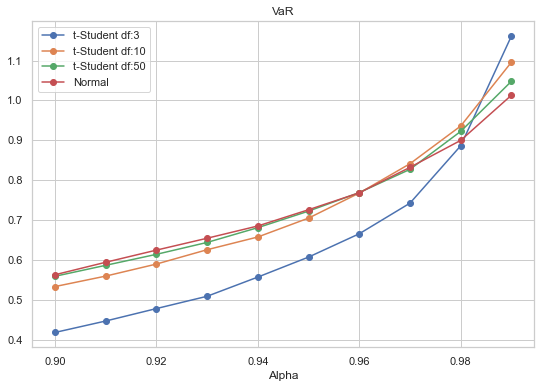

In [2]:
#calculating quantile for each alpha
var = np.quantile(loss, alpha, axis = 1)

def plotting_var(var, alpha):
    for j in range(0,4):
        if j < 3:
            plt.plot(alpha,var[:,j], label = f"t-Student df:{df[j]}", marker = "o")
        else:
            plt.plot(alpha, var[:,j], label = "Normal", marker = "o")
        plt.xlabel("Alpha")
        plt.legend()

plotting_var(var, alpha)
plt.title("VaR")
#plt.savefig('a_var.png', dpi=100, bbox_inches='tight')
plt.show()


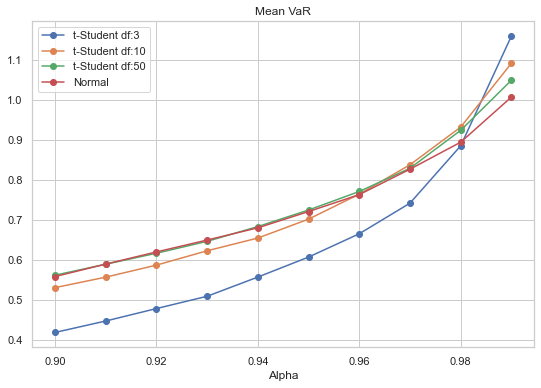

In [3]:
#calculating mean var

mean_var = np.quantile(loss, alpha, axis = 1) - np.mean(loss, axis = 1)


plotting_var(mean_var, alpha)
plt.title("Mean VaR")
#plt.savefig('meanvar.png', dpi=100, bbox_inches='tight')
plt.show()


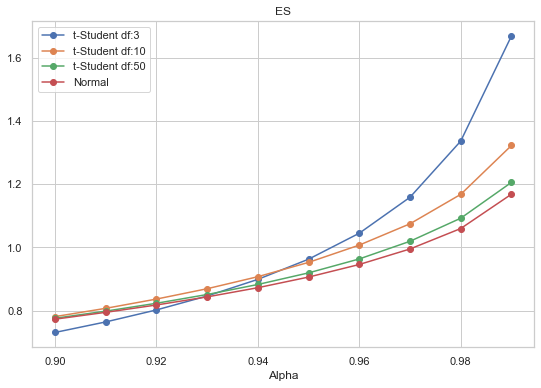

In [4]:
# calculating expected shortfall 

def expected_shortfall(a):    
    var_ = np.quantile(loss, a, axis = 1)[:,None]
    loss_larger = np.where(loss >=  var_, loss, float("NaN"))
    return np.nanmean(loss_larger, axis=1)


es = np.array([ expected_shortfall(j) for j in alpha ])


plotting_var(es, alpha)
plt.title("ES")
#plt.savefig('es.png', dpi=100, bbox_inches='tight')
plt.show()


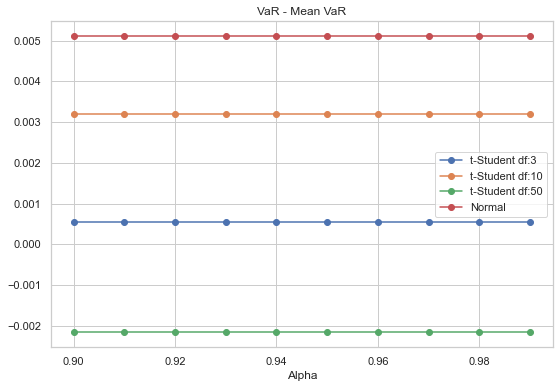

In [5]:
#differences VaR and Mean VaR 

plotting_var(var - mean_var, alpha)
plt.title("VaR - Mean VaR")
#plt.savefig('diff.png', dpi=100, bbox_inches='tight')
plt.show()
